#Bar Chart for the number of datapoints in the model

Created by: Clayton Miller

Nov. 4, 2104
Updated on July 28, 2015 for the JBPS journal paper

The purpose of this is to visualize the number of datapoints available from each of the buildings. We base this off of the points list.

Lataxify: http://nipunbatra.github.io/2014/08/latexify/

In [1]:
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("ETH_EMS_BMS_MasterPointList - ForTotalPointNumberViz.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,CategoryTag,TypeTag,EnglishTag,Adjusted_EnglishTag,BuildTag
0,NaN,V,MBW,Durchfluss,Brauchwarmwasser Verbrauch,Domestic hot water consumption,Domestic hot water,HC0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 0 to 1163
Data columns (total 8 columns):
Unnamed: 0             0 non-null float64
Unnamed: 1             807 non-null object
Unnamed: 2             807 non-null object
CategoryTag            807 non-null object
TypeTag                807 non-null object
EnglishTag             807 non-null object
Adjusted_EnglishTag    807 non-null object
BuildTag               807 non-null object
dtypes: float64(1), object(7)
memory usage: 81.8+ KB


In [5]:
countpiv = pd.pivot_table(df.drop(["Unnamed: 0","Unnamed: 1","CategoryTag","Unnamed: 2","TypeTag","EnglishTag"], axis=1), index='BuildTag', columns='Adjusted_EnglishTag', aggfunc=len)

In [6]:
countpiv.head()

Adjusted_EnglishTag,City gas,Cooling energy,Domestic hot water,Electricity,Grey water,Heating energy,Water consumption
BuildTag,,,,,,,
HC0,3,4,1,24,NaN,3,6
HC1,1,2,1,15,5,2,7
HC2,1,1,1,18,NaN,1,5
HC3,1,3,1,16,NaN,3,6
HC4,3,6,1,23,NaN,23,6


##Plot

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import matplotlib
SPINE_COLOR = 'gray'

In [8]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'text.fontsize': 10, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 7,
              'ytick.labelsize': 7,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

/Users/millerc/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


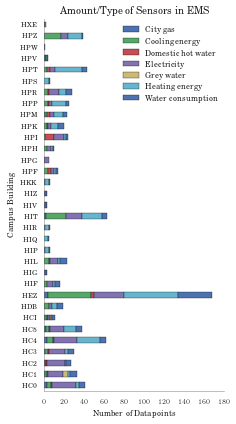

In [9]:
latexify(fig_height=6)
ax = countpiv.plot(kind="barh", stacked=True)
ax.set_xlabel("Number of Datapoints")
ax.set_ylabel("Campus Building")
ax.set_title("Amount/Type of Sensors in EMS")
ax.legend(loc=1)
plt.tight_layout()
format_axes(ax)
plt.savefig("pointbreakdown.pdf")

##Let's hide the building names by assigning a number

In [10]:
countpiv['sum'] = countpiv.sum(axis=1)

In [11]:
countpiv = countpiv.sort(columns="sum", ascending=False).drop(["sum"], axis=1)

In [12]:
countpiv = countpiv[["Cooling energy","Electricity","Heating energy","City gas","Domestic hot water","Grey water","Water consumption"]]

In [14]:
countpiv.head()

Adjusted_EnglishTag,Cooling energy,Electricity,Heating energy,City gas,Domestic hot water,Grey water,Water consumption
BuildTag,,,,,,,
HEZ,43,30,54,4,3,NaN,34
HIT,20,16,20,2,NaN,NaN,5
HC4,6,23,23,3,1,NaN,6
HPT,3,5,27,NaN,3,NaN,5
HC0,4,24,3,3,1,NaN,6


In [15]:
countpiv_anonymous = countpiv.reset_index().reset_index()

In [16]:
countpiv_anonymous = countpiv_anonymous.drop(['index','BuildTag'], axis=1)

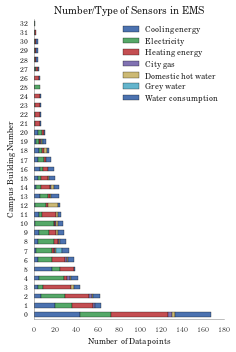

In [18]:
latexify(fig_height=5)
ax = countpiv_anonymous.plot(kind="barh", stacked=True)
ax.set_xlabel("Number of Datapoints")
ax.set_ylabel("Campus Building Number")
ax.set_title("Number/Type of Sensors in EMS")
ax.legend(loc=1)
ax.yaxis.grid(False)
# ax.xaxis.grid(False)

plt.tight_layout()
format_axes(ax)
plt.savefig("pointbreakdown_anon.pdf")